Error absoluto medio

Vamos a explorar otra métrica de evaluación conocida como EAM (Error Absoluto Medio o “Mean Absolute Error” en Inglés). Es similar al ECM (Error Cuadrático Medio), pero no eleva los errores al cuadrado.

¡Basta de hablar! Escribamos esta nueva métrica con símbolos. Primero, definamos la notación estándar en Data Science:

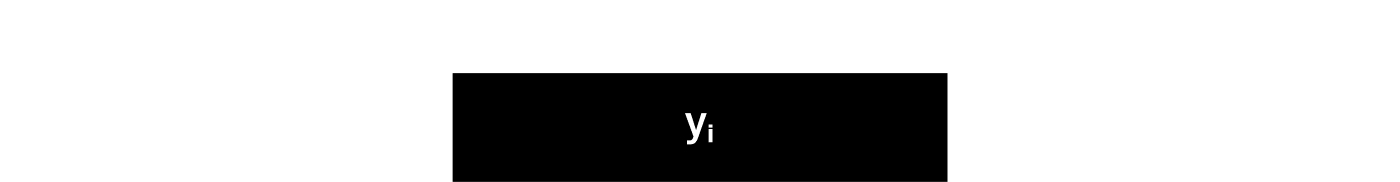

Valor objetivo real para la observación i en el conjunto de datos (por ejemplo, un conjunto de prueba). El subíndice i indica el número de la observación.

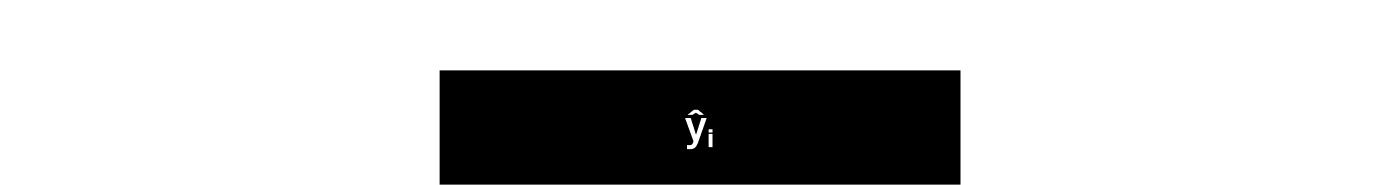

Valor predicho de la variable objetivo para la observación i en el conjunto de datos. El símbolo "sombrero" o circunflejo sobre la y indica que se trata de una estimación y no del valor real.

El error de predicción se calcula como la diferencia entre el valor real y el valor predicho:

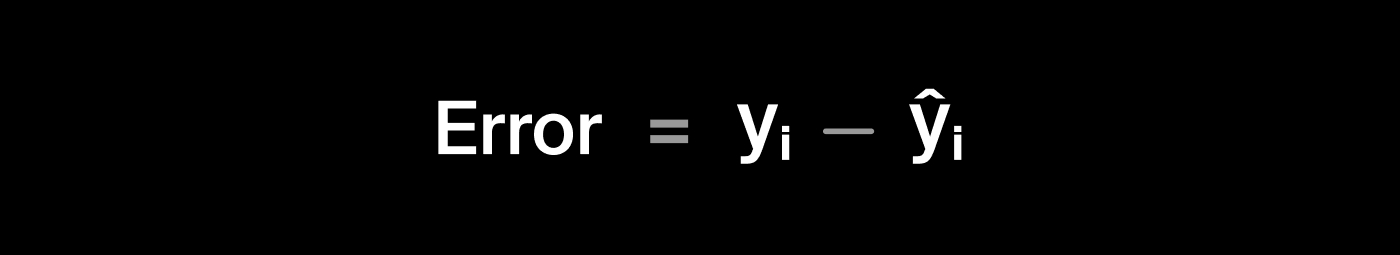

Para asegurarnos de que todas las diferencias se traten como valores positivos, utilizamos el valor absoluto del error:

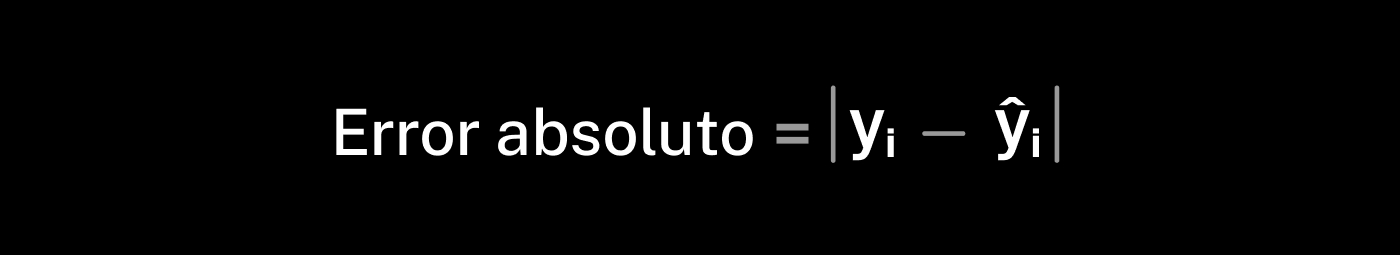

Para recopilar los errores a lo largo del conjunto de datos, agreguemos la siguiente notación:

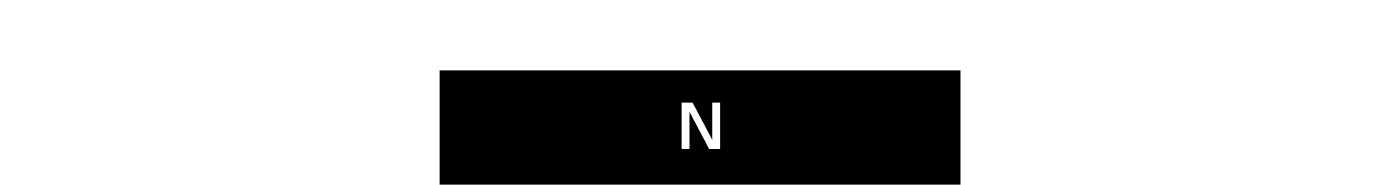

El número de observaciones en la muestra.

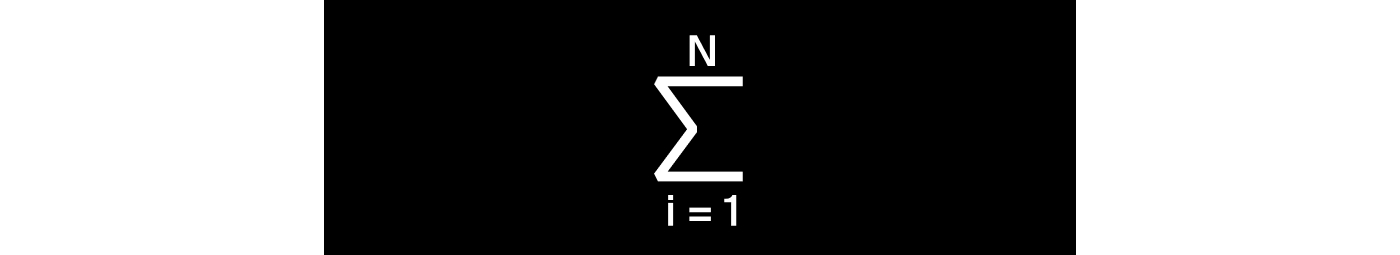

La suma de todas las observaciones del conjunto de datos (i varía en el rango de 1 a N).

Ahora podemos ver la fórmula para EAM o Error Absoluto Medio:

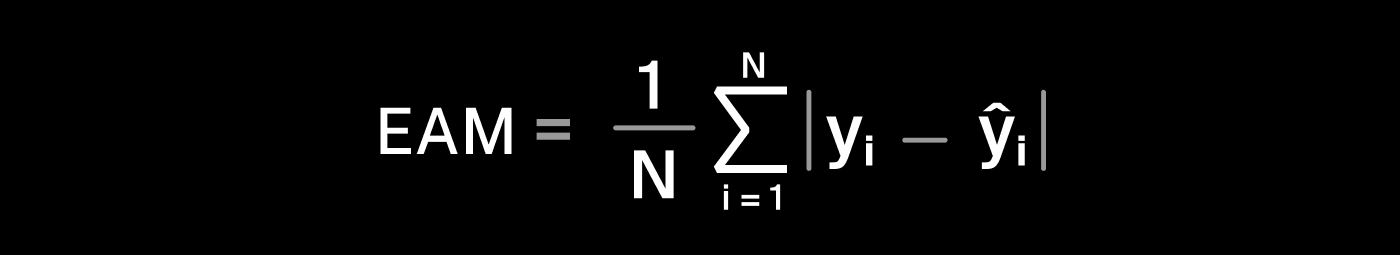

Ten en cuenta que en los ejercicios nos referiremos al EAM por su término inglés: MAE.

1. Codifica la función mae() según la fórmula. Esta función las respuestas y predicciones correctas y devuelve el valor de error absoluto medio.

Considera que en Python el valor absoluto se calcula usando la función abs().

Prueba la función en el ejemplo en precódigo. Muestra el resultado en la pantalla.

En la fórmula, el número de serie comienza en 1, pero en una serie de pandas, el primer elemento tiene un índice cero.

def mae(target, predictions):
    error = 0
    for i in range(target.shape[0]):
        error += abs(# < escribe el código aquí >)
    return error / target.shape[0]

In [ ]:
import pandas as pd

def mae(target, predictions):
    error = 0
    for i in range(target.shape[0]):
        # itera sobre los elementos individuales y acomula valor absoluto
        error += abs(target[i] - predictions[i])
    return error / target.shape[0]
    

target = pd.Series([-0.5, 2.1, 1.5, 0.3])
predictions = pd.Series([-0.6, 1.7, 1.6, 0.2])

print(mae(target, predictions))

#0.17500000000000004

2. Calcula EAM para la regresión lineal. Encuentra la función apropiada en la documentación de sklearn. Impórtala. Muéstrala en la pantalla.

La función se llama mean_absolute_error(). Se puede encontrar en el módulo sklearn.metrics:

from sklearn.metrics import mean_absolute_error

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# < escribe el código aquí >

data = pd.read_csv('/datasets/flights_preprocessed.csv')

target = data['Arrival Delay']
features = data.drop(['Arrival Delay'], axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print(mean_absolute_error(target_valid, predicted_valid))

# 27.436250978085834

Esto es mucho o poco? A diferencia de RECM, en EAM no se eleva al cuadrado ni se extrae la raíz. 

Por lo tanto, la interpretación de los valores es más fácil. Si el error absoluto medio del modelo es 27, entonces el error medio de cada observación es 27 minutos.